In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

interessantes## Abrindo dados

In [2]:
df = pd.read_parquet(path="./../data/clean_data/eda_clusters.parquet")
df

,comdate_diff,price,freight_value,commercial_dates_day_since_year_start,commercial_dates_year,commercial_dates_month,commercial_dates_day,order_purchase_day_since_year_start,order_purchase_year,order_purchase_month,...,mean_price_by_commercial_date,std_price_by_commercial_date,commercial_date_coded,time_window_order_coded,filtered_category_coded,cluster,hue,filtered_category,commercial_date,time_window_order
0,11,289.00,46.48,0,2018,1,1,11,2018,1,...,92.179011,169.492277,7,1,13,0,cluster_0,Utilidades domésticas,Não se aplica,Mais de duas semanas
1,-28,259.90,22.31,284,2017,10,12,256,2017,9,...,116.931149,158.173943,7,1,6,1,cluster_1,Esporte e lazer,Não se aplica,Mais de duas semanas
2,-17,14.99,7.78,66,2018,3,8,49,2018,2,...,106.874941,134.596300,1,0,8,2,cluster_2,Acessórios de informática,Dia da Mulher,Duas semanas
3,17,25.00,14.10,0,2018,1,1,17,2018,1,...,108.666584,118.364277,7,1,3,0,cluster_0,Brinquedos,Não se aplica,Mais de duas semanas
4,7,99.90,22.57,0,2018,1,1,7,2018,1,...,82.903521,59.651270,9,1,9,0,cluster_0,Movéis de decoração,Reveillon,Mais de duas semanas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87849,-8,55.00,20.88,358,2017,12,25,350,2017,12,...,100.261696,126.620747,6,0,13,1,cluster_1,Utilidades domésticas,Natal,Duas semanas
87850,3,114.90,14.16,90,2018,4,1,93,2018,4,...,106.242859,104.834845,8,1,6,2,cluster_2,Esporte e lazer,Páscoa,Mais de duas semanas
87851,7,37.00,19.04,90,2018,4,1,97,2018,4,...,115.585435,176.533677,8,1,2,2,cluster_2,Beleza e saúde,Páscoa,Mais de duas semanas
87852,-21,689.00,22.07,327,2017,11,24,306,2017,11,...,204.739577,287.452591,0,0,11,1,cluster_1,Relógios e presentes,Black Friday,Duas semanas


In [3]:
df_data = df.drop(columns=["filtered_category", "commercial_date", "time_window_order"])

## EDA

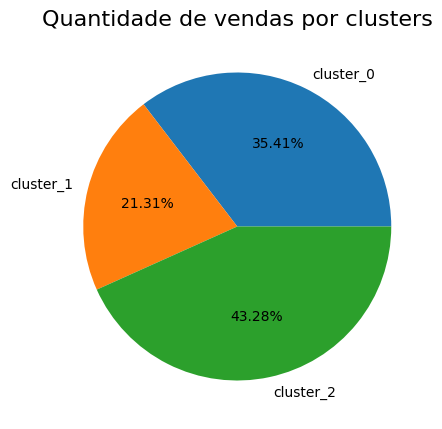

In [4]:
grouped_cluster= df.groupby(['hue'])['hue'].count()
grouped_cluster = grouped_cluster.reset_index(name='qtd')
grouped_cluster

plt.figure(figsize=(8, 5))
plt.title('Quantidade de vendas por clusters', fontsize=16)
plt.pie(grouped_cluster['qtd'], labels=grouped_cluster['hue'], autopct='%1.2f%%')
plt.show()

In [5]:
grouped_category_per_cluster= df.groupby(['hue', "filtered_category"])["filtered_category"].count().reset_index(name='qtd_percategory')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_category_per_cluster, x='hue', y='qtd_percategory', hue='filtered_category')
plt.title('Quantidade de vendas por categorias entre os clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Categorias', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.figure(figsize=(28, 8))
sns.barplot(data=grouped_category_per_cluster, x='filtered_category', y='qtd_percategory', hue='hue')
plt.title('Quantidade de vendas por categorias entre os clusters', fontsize=16)
plt.xlabel('Categorias', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
# grouped_category_per_cluster.to_parquet("./../data/clean_data/df_grouped_category_per_cluster.parquet")

In [ ]:
# grouped_category_per_year_cluster= df.groupby(['hue', "order_purchase_year", "filtered_category"])["filtered_category"].count()
# grouped_category_per_year_cluster = grouped_category_per_year_cluster.reset_index(name='qtd_per_yearcategory')

# anos = sorted(list(grouped_category_per_year_cluster["order_purchase_year"].unique()))
# for y in anos:
#     df_temp = grouped_category_per_year_cluster[grouped_category_per_year_cluster['order_purchase_year'] == y]
#     sns.set(style="whitegrid")
#     plt.figure(figsize=(10, 5))
#     sns.barplot(data=df_temp, x='hue', y='qtd_per_yearcategory', hue='filtered_category')
#     plt.title('Quantidade de vendas por categorias entre os clusters no ano {y}', fontsize=16)
#     plt.xlabel('Cluster', fontsize=14)
#     plt.ylabel('Quantidade de vendas', fontsize=14)
#     plt.legend(title='Categorias', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.show()

In [ ]:
grouped_commercialdate_per_cluster= df.groupby(['hue', "commercial_date"])["commercial_date"].count()
grouped_commercialdate_per_cluster = grouped_commercialdate_per_cluster.reset_index(name='qtd_percommercialdate')
# grouped_commercialdate_per_cluster.to_parquet("./../data/clean_data/df_grouped_category_per_cluster.parquet")

sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.barplot(data=grouped_commercialdate_per_cluster, x='hue', y='qtd_percommercialdate', hue='commercial_date')
plt.title('Quantidade de vendas por feriado entre os clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Feriados', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.barplot(data=grouped_commercialdate_per_cluster, x='commercial_date', y='qtd_percommercialdate', hue='hue')
plt.title('Quantidade de vendas por cluster entre os feriados', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Clusters', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()